## Reading and Understanding the dataset

In [1]:
# Importing all liabraries :

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [100]:
# Reading the data set 

df = pd.read_csv('day.csv')

In [101]:
# Cheking the head of the data 

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [102]:
# Checking shape of dataset

df.shape

(730, 16)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [104]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Dropping unnecessary variables :

1. instant : Dropping this variable as its just represent the number of data row and not giving any additional information
2. dteday  : Dropping this variable as we already have day, month and year variables which are sufficient for our modelling 
3. causal & Registered : These both variable are input for target variable and also these will not available while predicting target variable hence dropping these variable is good approach.

In [105]:
unneccesary_var = ['instant', 'dteday', 'casual', 'registered' ]

In [106]:
df = df.drop(unneccesary_var, axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [107]:
df.shape

(730, 12)

### Creating list of numerical variable and categorical variable.

As per data understanding gain from data dictionary season, month, year, weekday and weathersit are categorical column hence first we have to convert their data type to category

In [108]:
categorical_var = ['season', 'yr', 'mnth', 'weekday', 'weathersit']
df[categorical_var] = df[categorical_var].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    category
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(5), float64(4), int64(3)
memory usage: 44.8 KB


In [109]:
numerical_var = ['holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [110]:
print(df.weekday.unique())

[1, 2, 3, 4, 5, 6, 0]
Categories (7, int64): [0, 1, 2, 3, 4, 5, 6]


In [111]:
df['season'] = df['season'].map({1 : 'spring', 2 : 'summer', 3 : 'fall', 4 : 'winter'})

df['yr'] = df['yr'].map({0 : '2018', 1 : '2019'})

df['mnth'] = df['mnth'].map({1 : 'january', 2 : 'february', 3 : 'march', 4 : 'april', 5 : 'may', 6 : 'june', 7 : 'july', 
                             8 : 'august', 9 : 'september', 10 : 'october', 11: 'november',12: 'december'})

df['weekday'] = df['weekday'].map({0: 'sunday', 1: 'monday', 2: 'tuesday', 3: 'wednesday', 4: 'thursday', 5: 'friday', 
                                   6: 'saturday'})

# EDA

In [112]:
df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

### Observations :
1. Null values are not present for any of the variable
2. All data types have int or float dtype except 'dteday'

In [113]:
# Visualising numeric variable first

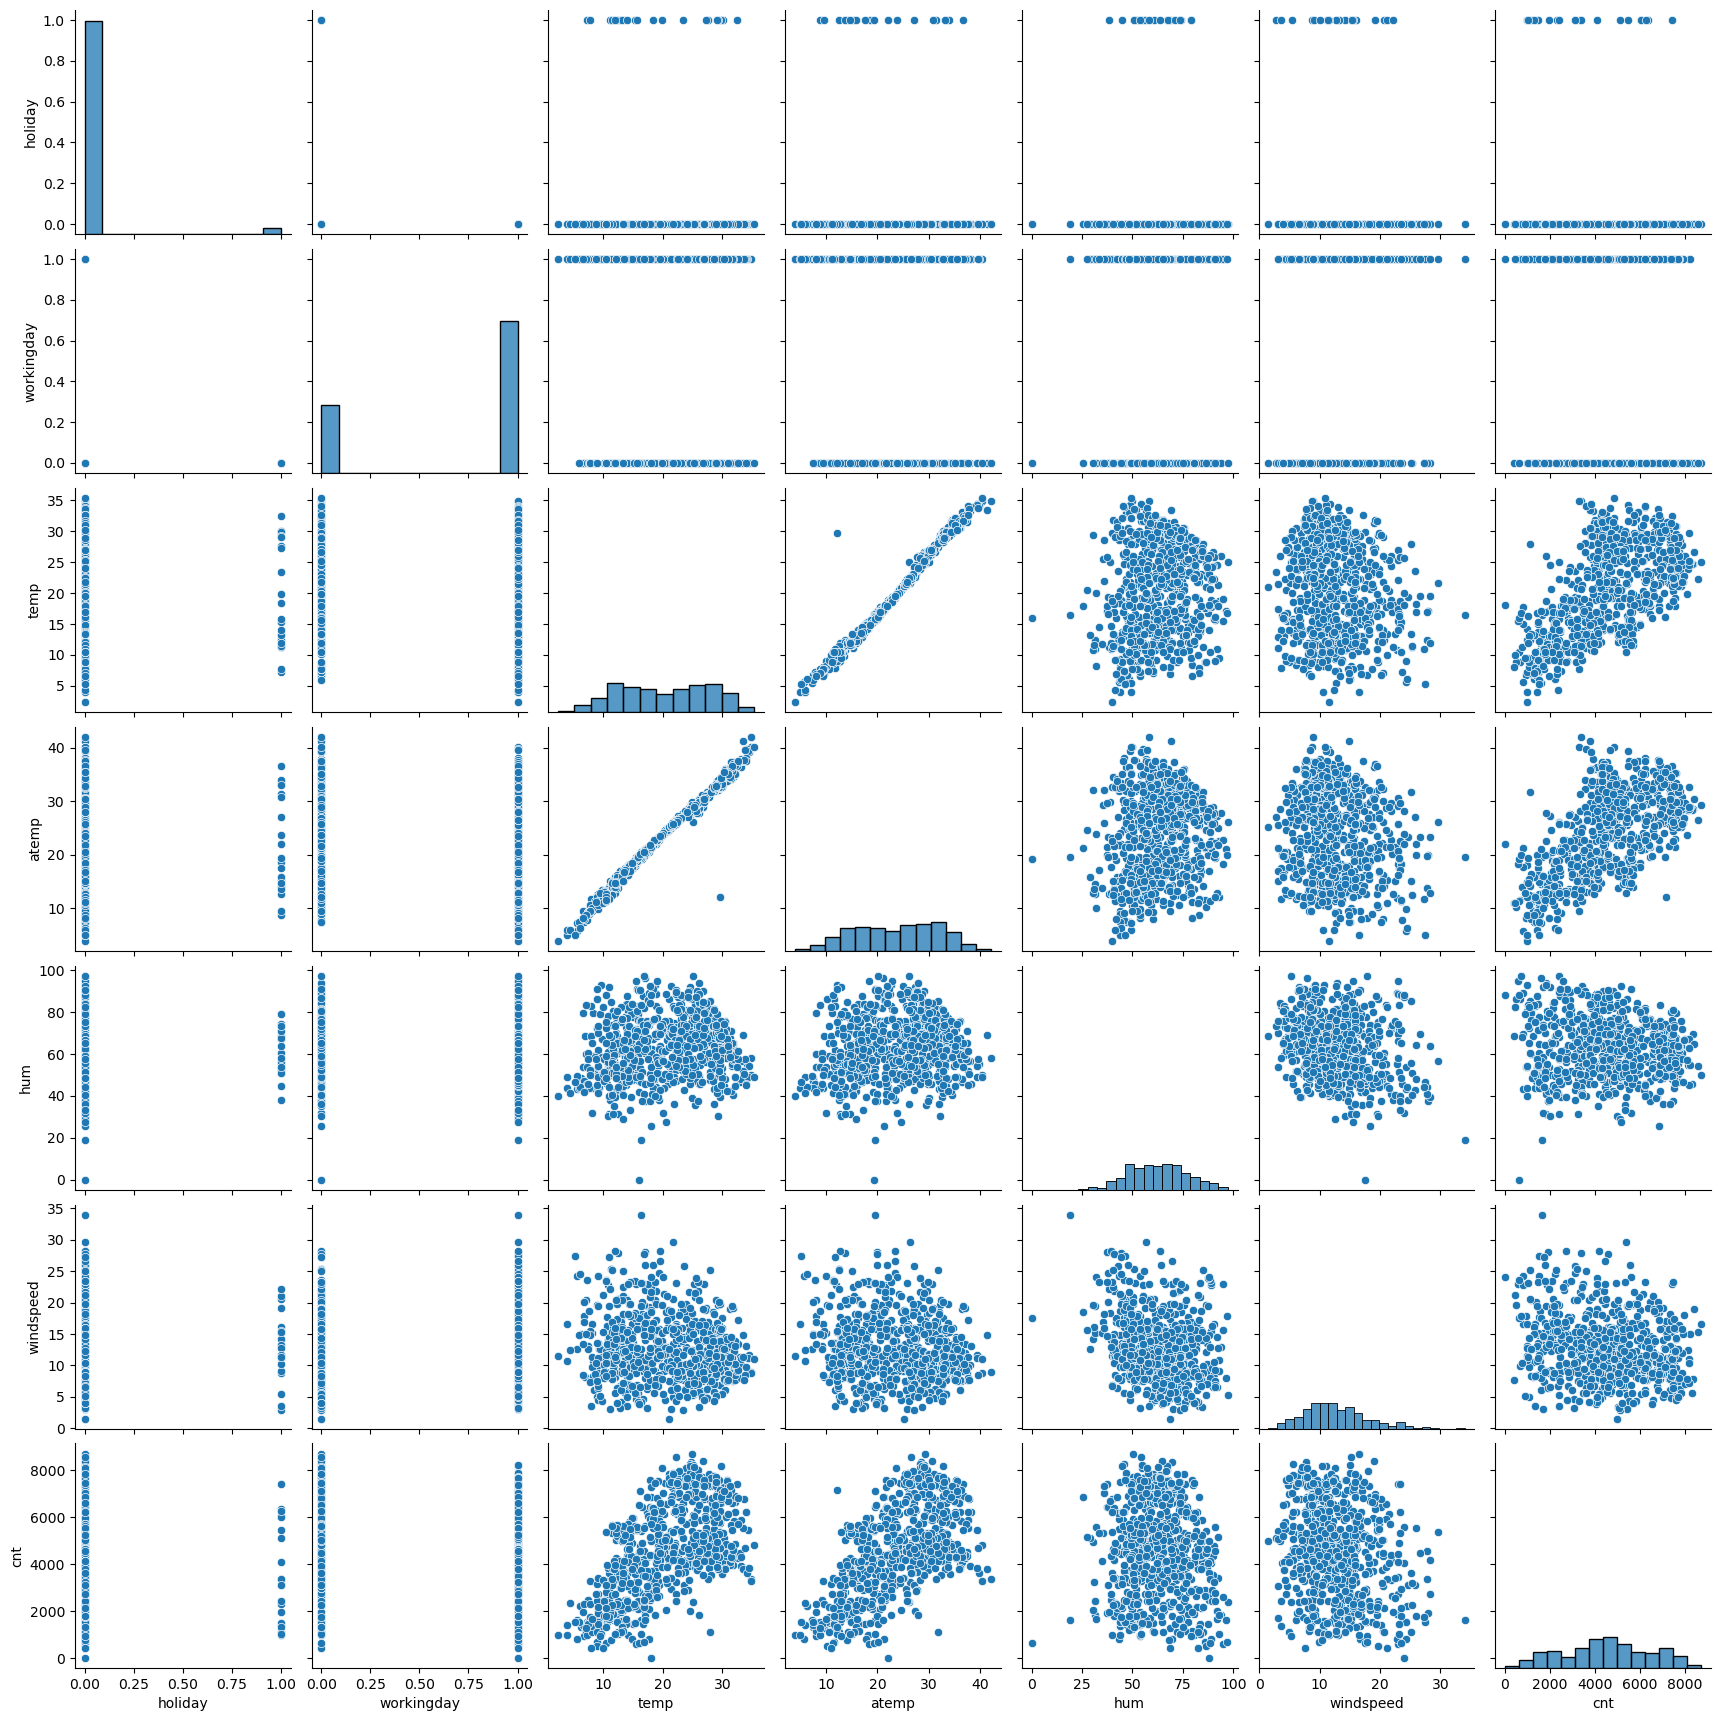

In [114]:
sns.pairplot(df[numerical_var])
plt.show()

### Inferences :

1. There is strong co-relation between atemp and temp variable and which can be cause multicolinearity issue in later stage.
2. 'atemp' and 'temp' variable is having good co-relation with target variable 'cnt'

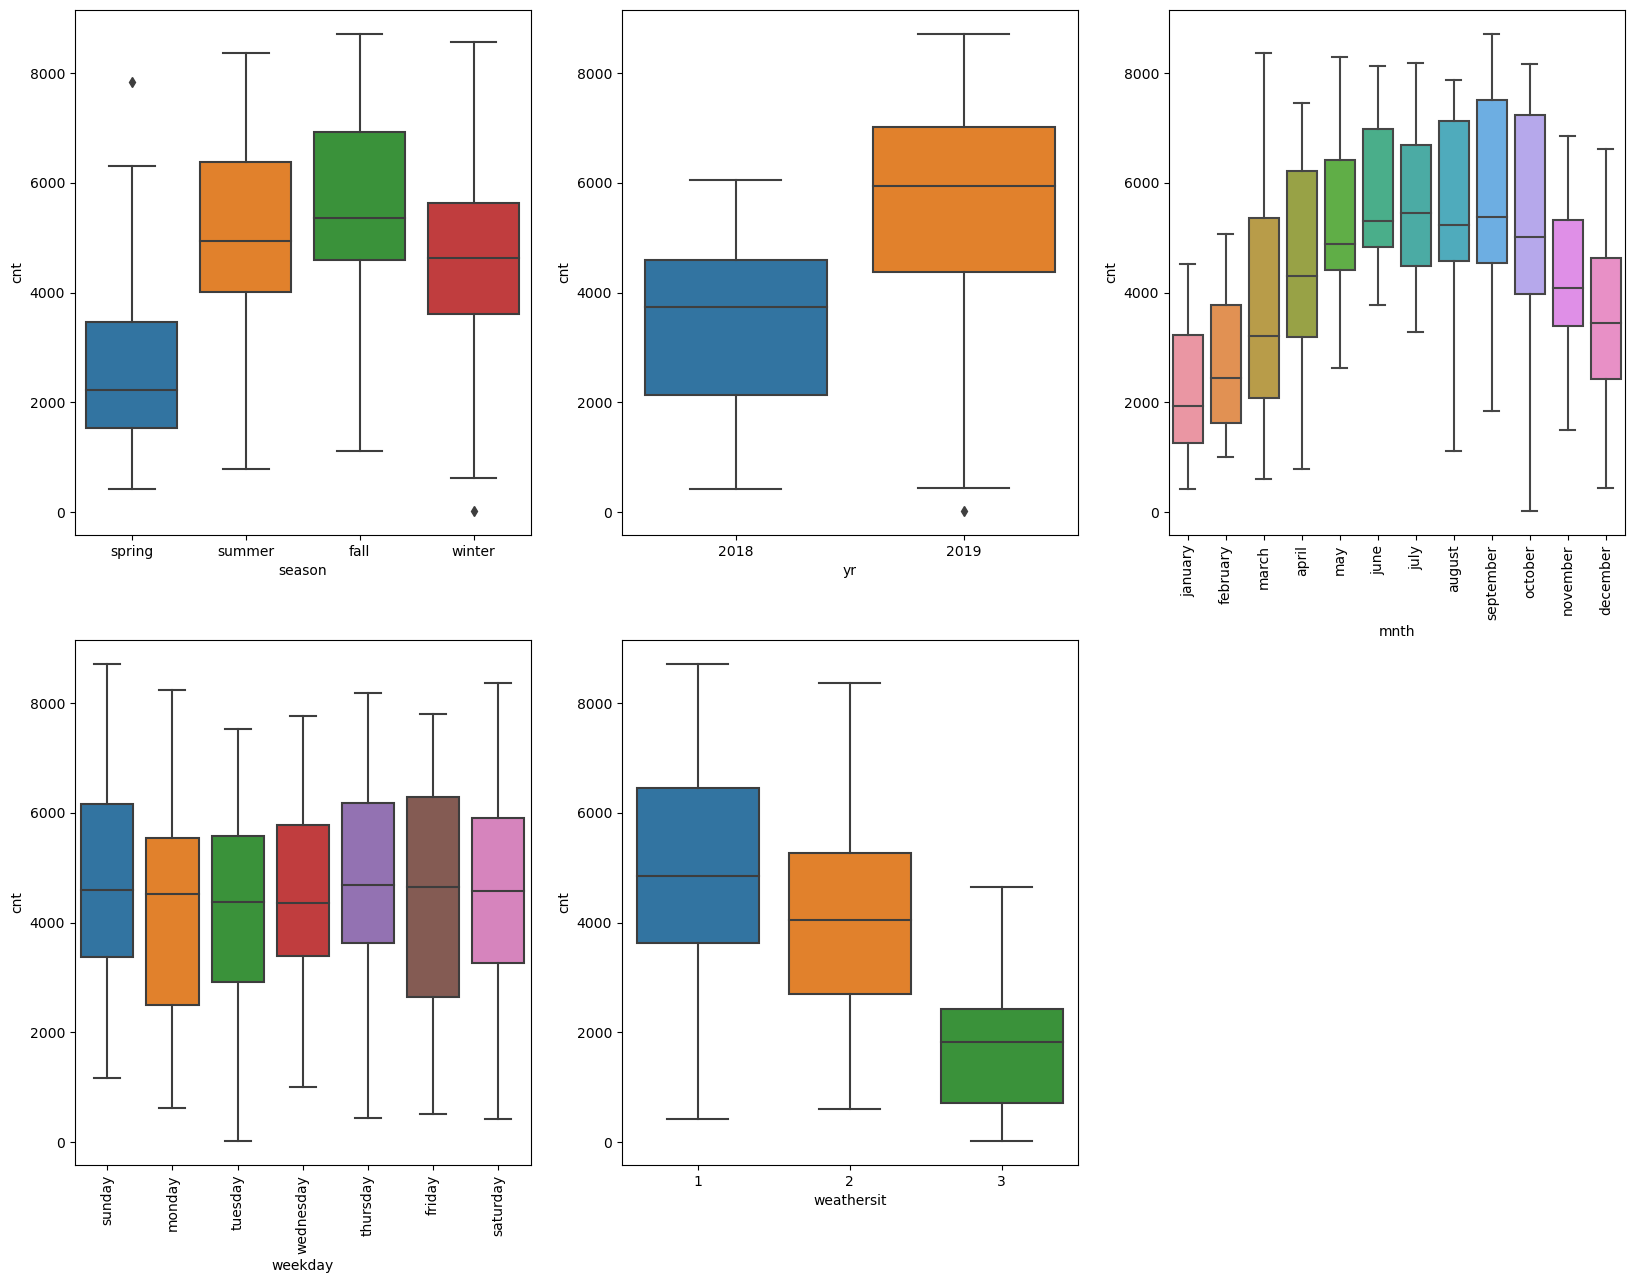

In [116]:
plt.figure(figsize=[20,15])
plt.subplot(2,3,1)
sns.boxplot(x = 'season' , y = 'cnt' , data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr' , y = 'cnt' , data = df)
plt.subplot(2,3,3)
plt.xticks(rotation=90)
sns.boxplot(x = 'mnth' , y = 'cnt' , data = df)
plt.subplot(2,3,4)
plt.xticks(rotation=90)
sns.boxplot(x = 'weekday' , y = 'cnt' , data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'weathersit' , y = 'cnt' , data = df)
plt.show()

### Inferences :

1. Demand of shared bikes are high in summer and fall season as compared to spring and winter
2. In 2019, demand of shared bikes are increase as compared to 2018
3. june, july, August, September are the months where demand of shared bikes is very high.
4. There no strong relation between day of week and bikes demand
5. Demand of shared bikes are slightly high when weathersit is clear and less cloudy

# Data Preparation

In [117]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,january,0,monday,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,january,0,tuesday,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,january,0,wednesday,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,january,0,thursday,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,january,0,friday,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [119]:
dummy_categories = pd.get_dummies(df[categorical_var], drop_first= True)

In [120]:
dummy_categories.head()

,season_summer,season_fall,season_winter,yr_2019,mnth_february,mnth_march,mnth_april,mnth_may,mnth_june,mnth_july,mnth_august,mnth_september,mnth_october,mnth_november,mnth_december,weekday_monday,weekday_tuesday,weekday_wednesday,weekday_thursday,weekday_friday,weekday_saturday,weathersit_2,weathersit_3
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [121]:
pd.options.display.max_columns = None 

In [122]:
df = pd.concat([df, dummy_categories ], axis = 1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,season_winter,yr_2019,mnth_february,mnth_march,mnth_april,mnth_may,mnth_june,mnth_july,mnth_august,mnth_september,mnth_october,mnth_november,mnth_december,weekday_monday,weekday_tuesday,weekday_wednesday,weekday_thursday,weekday_friday,weekday_saturday,weathersit_2,weathersit_3
0,spring,2018,january,0,monday,1,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,spring,2018,january,0,tuesday,1,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,spring,2018,january,0,wednesday,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,spring,2018,january,0,thursday,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,spring,2018,january,0,friday,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


#### As we have created dummy variable for categorical variable of season, year, month, weekday & weathersit, let's Drop the original variables

In [123]:
df = df.drop(df[categorical_var], axis=1 )

In [124]:
df.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,season_winter,yr_2019,mnth_february,mnth_march,mnth_april,mnth_may,mnth_june,mnth_july,mnth_august,mnth_september,mnth_october,mnth_november,mnth_december,weekday_monday,weekday_tuesday,weekday_wednesday,weekday_thursday,weekday_friday,weekday_saturday,weathersit_2,weathersit_3
0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [125]:
df.shape

(730, 30)

# Splitting Data in Training and Testing Sets

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
df_train , df_test = train_test_split(df , train_size = 0.7 , test_size= 0.3 , random_state= 100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


### Rescaling the features using MinMaxScaler method

In [128]:
from sklearn.preprocessing import MinMaxScaler

In [129]:
scaler = MinMaxScaler()

In [130]:
scale_features = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[scale_features] = scaler.fit_transform(df_train[scale_features])

In [131]:
df_train.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,season_winter,yr_2019,mnth_february,mnth_march,mnth_april,mnth_may,mnth_june,mnth_july,mnth_august,mnth_september,mnth_october,mnth_november,mnth_december,weekday_monday,weekday_tuesday,weekday_wednesday,weekday_thursday,weekday_friday,weekday_saturday,weathersit_2,weathersit_3
653,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
576,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
426,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
728,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
482,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [132]:
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
holiday,510.0,0.025490,0.157763,0.0,0.000000,0.000000,0.000000,1.0
workingday,510.0,0.711765,0.453386,0.0,0.000000,1.000000,1.000000,1.0
temp,510.0,0.537262,0.225844,0.0,0.339853,0.540519,0.735215,1.0
atemp,510.0,0.512989,0.212385,0.0,0.332086,0.526811,0.688457,1.0
hum,510.0,0.650369,0.145882,0.0,0.538643,0.653714,0.754830,1.0
windspeed,510.0,0.320768,0.169797,0.0,0.199179,0.296763,0.414447,1.0
cnt,510.0,0.513620,0.224593,0.0,0.356420,0.518638,0.684710,1.0
season_summer,510.0,0.245098,0.430568,0.0,0.000000,0.000000,0.000000,1.0
season_fall,510.0,0.262745,0.440557,0.0,0.000000,0.000000,1.000000,1.0
season_winter,510.0,0.249020,0.432870,0.0,0.000000,0.000000,0.000000,1.0


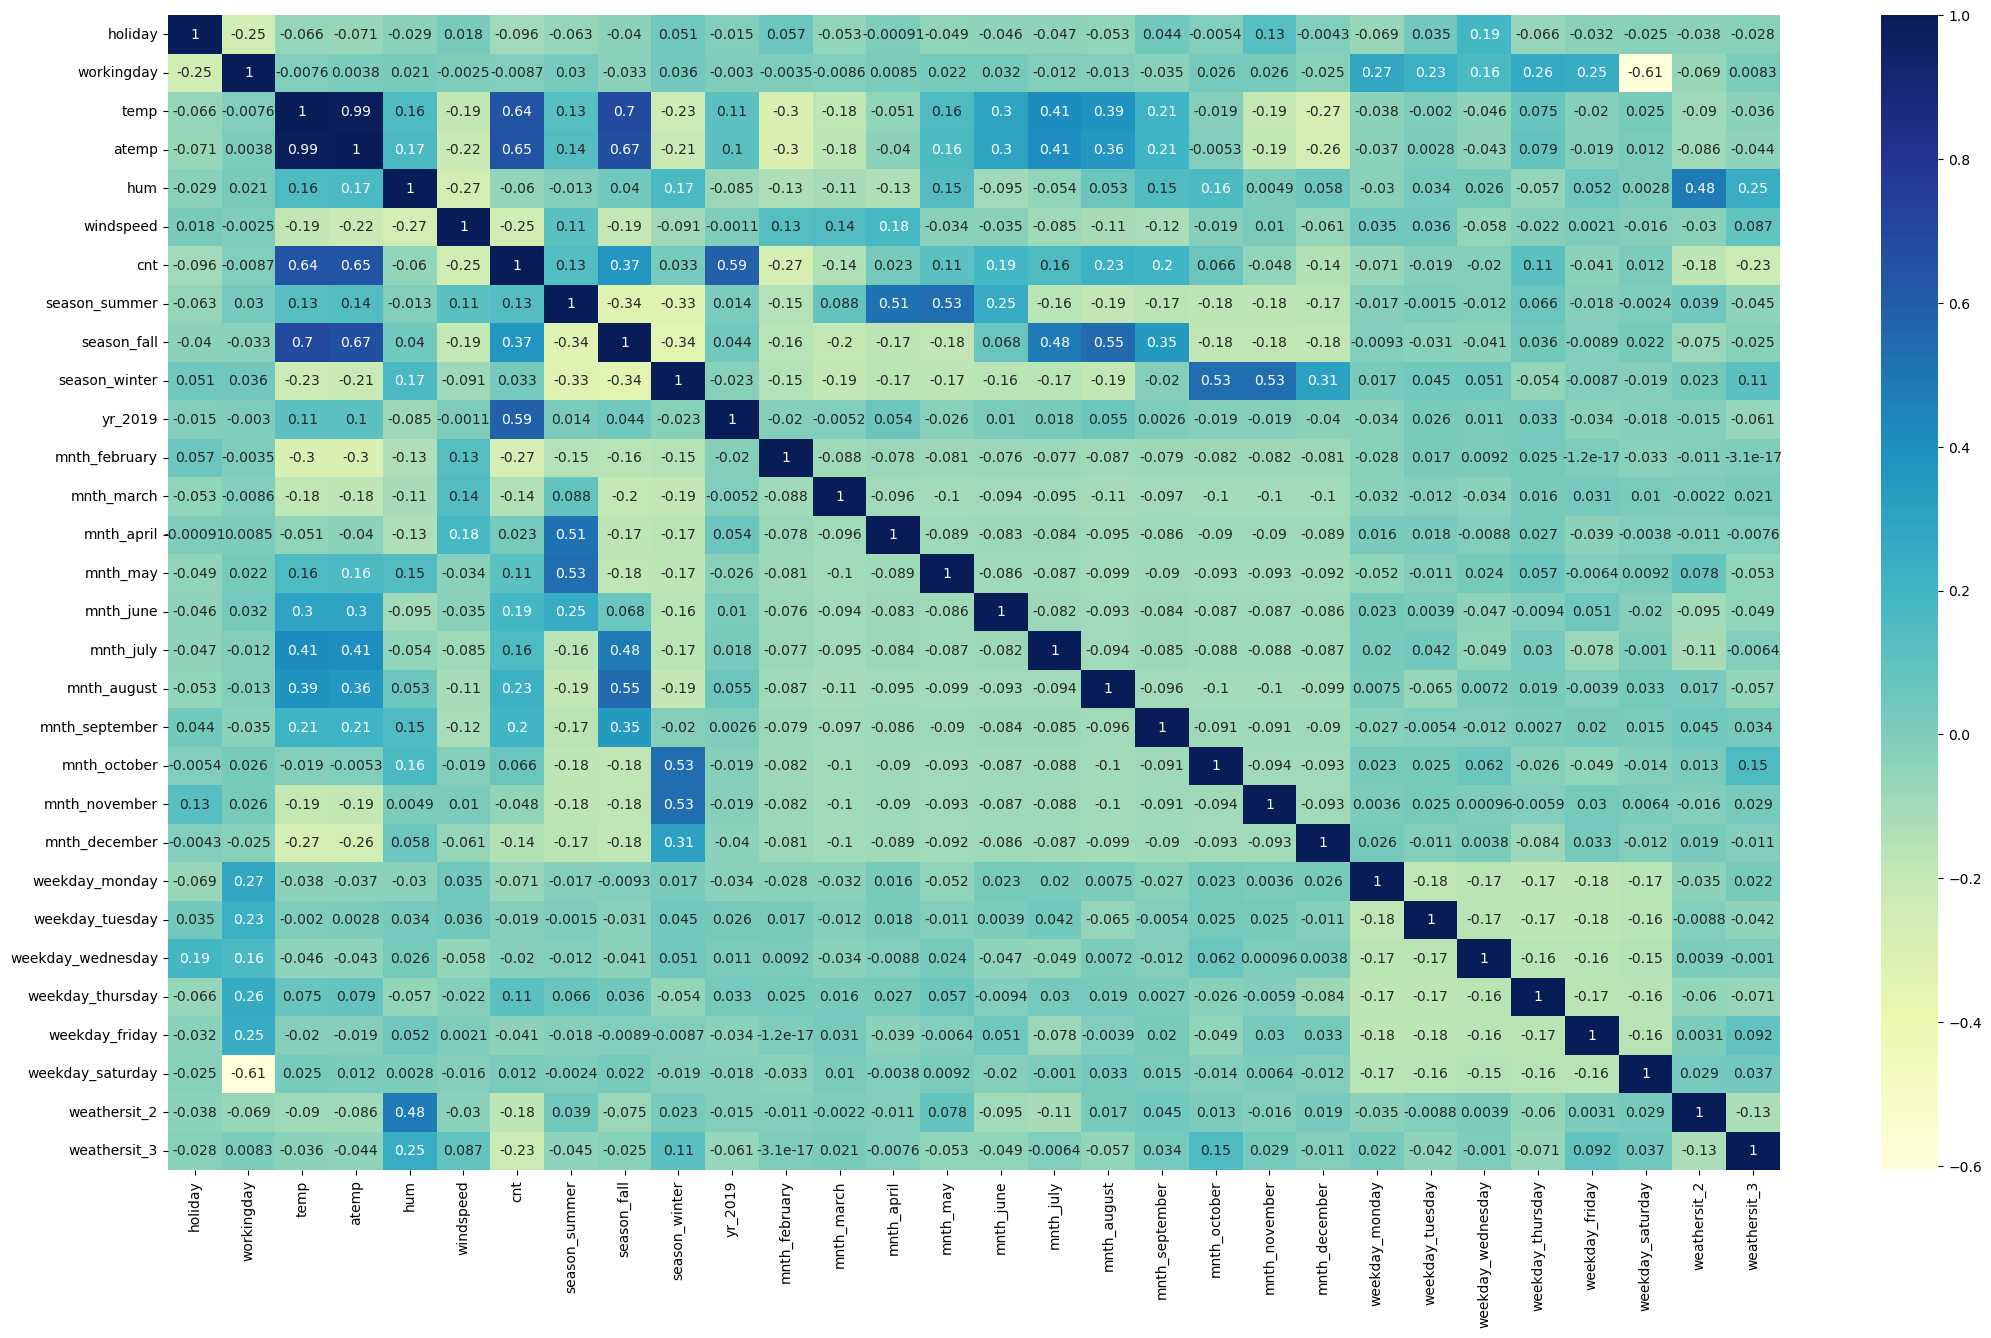

In [133]:
plt.figure(figsize=(26,15))
sns.heatmap(df_train.corr(), annot=True , cmap="YlGnBu" )
plt.show()

# Inference :

1. 'atemp' & 'temp' variable are highly correlated with each other which can caused multicollinearity issue.
2. 'atemp' & 'temp' variable are having good correlation with target variable 'cnt'.

In [134]:
y_train = df_train.pop('cnt')
X_train = df_train

In [135]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [136]:
X_train.head()

,holiday,workingday,temp,atemp,hum,windspeed,season_summer,season_fall,season_winter,yr_2019,mnth_february,mnth_march,mnth_april,mnth_may,mnth_june,mnth_july,mnth_august,mnth_september,mnth_october,mnth_november,mnth_december,weekday_monday,weekday_tuesday,weekday_wednesday,weekday_thursday,weekday_friday,weekday_saturday,weathersit_2,weathersit_3
653,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
576,0,1,0.815169,0.766351,0.725633,0.264686,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
426,0,0,0.442393,0.438975,0.640189,0.255342,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
728,0,1,0.245101,0.200348,0.498067,0.663106,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
482,0,0,0.395666,0.391735,0.504508,0.188475,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


# Building a linear model

In [137]:
import statsmodels.api as sm

In [138]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [139]:
model = LinearRegression()
model.fit(X_train, y_train)

rfe = RFE( model , n_features_to_select= 15)
rfe = rfe.fit(X_train, y_train)

In [140]:
list(zip(X_train, rfe.support_ , rfe.ranking_))

[('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_summer', True, 1),
 ('season_fall', True, 1),
 ('season_winter', True, 1),
 ('yr_2019', True, 1),
 ('mnth_february', False, 11),
 ('mnth_march', True, 1),
 ('mnth_april', False, 2),
 ('mnth_may', True, 1),
 ('mnth_june', False, 3),
 ('mnth_july', False, 12),
 ('mnth_august', True, 1),
 ('mnth_september', True, 1),
 ('mnth_october', True, 1),
 ('mnth_november', False, 13),
 ('mnth_december', False, 14),
 ('weekday_monday', False, 9),
 ('weekday_tuesday', False, 10),
 ('weekday_wednesday', False, 8),
 ('weekday_thursday', False, 6),
 ('weekday_friday', False, 7),
 ('weekday_saturday', False, 15),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [141]:
Top_15_Features = X_train.columns[rfe.support_]
print(Top_15_Features)

Index(['holiday', 'temp', 'hum', 'windspeed', 'season_summer', 'season_fall',
       'season_winter', 'yr_2019', 'mnth_march', 'mnth_may', 'mnth_august',
       'mnth_september', 'mnth_october', 'weathersit_2', 'weathersit_3'],
      dtype='object')


In [142]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'mnth_february', 'mnth_april', 'mnth_june',
       'mnth_july', 'mnth_november', 'mnth_december', 'weekday_monday',
       'weekday_tuesday', 'weekday_wednesday', 'weekday_thursday',
       'weekday_friday', 'weekday_saturday'],
      dtype='object')

###  Model 01

In [143]:
X_train_new = X_train[Top_15_Features]

In [144]:
# Adding constant to X_train 
X_train_rfe = sm.add_constant(X_train_new)

model_01 = sm.OLS(y_train, X_train_rfe).fit()

print(model_01.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.3
Date:                Sun, 01 Oct 2023   Prob (F-statistic):          2.95e-189
Time:                        17:37:24   Log-Likelihood:                 514.85
No. Observations:                 510   AIC:                            -997.7
Df Residuals:                     494   BIC:                            -929.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2376      0.027      8.

In [145]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [146]:
# Checking variance inflation factor for all variables

vif = pd.DataFrame()
vif['Feature'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by= 'VIF', ascending= False)
vif

,Feature,VIF
1,temp,24.64
2,hum,15.55
5,season_fall,8.80
3,windspeed,3.80
4,season_summer,3.73
6,season_winter,3.13
13,weathersit_2,2.15
7,yr_2019,2.04
10,mnth_august,1.85
9,mnth_may,1.68


###  Model 02

In [149]:
X_train_new = X_train_new.drop('mnth_may', axis= 1)
X_train_new.head()

,holiday,temp,hum,windspeed,season_summer,season_fall,season_winter,yr_2019,mnth_march,mnth_august,mnth_september,mnth_october,weathersit_2,weathersit_3
653,0,0.509887,0.575354,0.300794,0,0,1,1,0,0,0,1,0,0
576,0,0.815169,0.725633,0.264686,0,1,0,1,0,0,0,0,0,0
426,0,0.442393,0.640189,0.255342,0,0,0,1,1,0,0,0,1,0
728,0,0.245101,0.498067,0.663106,0,0,0,1,0,0,0,0,0,0
482,0,0.395666,0.504508,0.188475,1,0,0,1,0,0,0,0,1,0


In [150]:
X_train_rfe = sm.add_constant(X_train_new)

model_02 = sm.OLS(y_train, X_train_rfe).fit()

print(model_02.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     192.2
Date:                Sun, 01 Oct 2023   Prob (F-statistic):          9.02e-190
Time:                        17:37:26   Log-Likelihood:                 513.33
No. Observations:                 510   AIC:                            -996.7
Df Residuals:                     495   BIC:                            -933.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2321      0.027      8.

In [151]:
vif = pd.DataFrame()
vif['Feature'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by= 'VIF', ascending= False)
vif

,Feature,VIF
1,temp,24.01
2,hum,15.51
5,season_fall,8.53
3,windspeed,3.73
4,season_summer,3.51
6,season_winter,3.07
12,weathersit_2,2.15
7,yr_2019,2.03
9,mnth_august,1.85
11,mnth_october,1.64


#### We will be dropping 'season_fall' variable first as it has high p-value as well as high VIF and its always good to first drop high p-value with high VIF rather than dropping high VIF variable first.

### Model 03

In [152]:
X_train_new = X_train_new.drop('season_fall', axis= 1)

In [153]:
X_train_rfe = sm.add_constant(X_train_new)

model_03 = sm.OLS(y_train, X_train_rfe).fit()

print(model_03.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     206.1
Date:                Sun, 01 Oct 2023   Prob (F-statistic):          2.26e-190
Time:                        17:37:27   Log-Likelihood:                 511.99
No. Observations:                 510   AIC:                            -996.0
Df Residuals:                     496   BIC:                            -936.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2324      0.027      8.

In [154]:

vif = pd.DataFrame()
vif['Feature'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by= 'VIF', ascending= False)
vif

,Feature,VIF
2,hum,14.75
1,temp,10.01
3,windspeed,3.69
5,season_winter,2.34
11,weathersit_2,2.14
6,yr_2019,2.02
4,season_summer,1.83
8,mnth_august,1.61
10,mnth_october,1.61
9,mnth_september,1.34


#### Dropping 'mnth_march' variable as it has high p-value and then updating the model

### Model 04

In [155]:
X_train_new = X_train_new.drop('mnth_march', axis= 1)

In [156]:
X_train_rfe = sm.add_constant(X_train_new)

model_04 = sm.OLS(y_train, X_train_rfe).fit()

print(model_04.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     222.3
Date:                Sun, 01 Oct 2023   Prob (F-statistic):          6.02e-191
Time:                        17:37:28   Log-Likelihood:                 510.54
No. Observations:                 510   AIC:                            -995.1
Df Residuals:                     497   BIC:                            -940.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2390      0.027      8.

In [157]:
vif = pd.DataFrame()
vif['Feature'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by= 'VIF', ascending= False)
vif

,Feature,VIF
2,hum,14.41
1,temp,9.88
3,windspeed,3.59
5,season_winter,2.27
10,weathersit_2,2.13
6,yr_2019,2.02
4,season_summer,1.83
9,mnth_october,1.61
7,mnth_august,1.60
8,mnth_september,1.34


#### Dropping 'hum' variable as it has VIF value is greater than 5 which shows multicollinearity of that variable with others

### Model 05

In [158]:
X_train_new.head()

,holiday,temp,hum,windspeed,season_summer,season_winter,yr_2019,mnth_august,mnth_september,mnth_october,weathersit_2,weathersit_3
653,0,0.509887,0.575354,0.300794,0,1,1,0,0,1,0,0
576,0,0.815169,0.725633,0.264686,0,0,1,0,0,0,0,0
426,0,0.442393,0.640189,0.255342,0,0,1,0,0,0,1,0
728,0,0.245101,0.498067,0.663106,0,0,1,0,0,0,0,0
482,0,0.395666,0.504508,0.188475,1,0,1,0,0,0,1,0


In [159]:
X_train_new = X_train_new.drop('hum', axis=1)

In [160]:
# Adding constant to X_train 
X_train_rfe = sm.add_constant(X_train_new)

model_05 = sm.OLS(y_train, X_train_rfe).fit()

print(model_05.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.1
Date:                Sun, 01 Oct 2023   Prob (F-statistic):          3.21e-187
Time:                        17:37:28   Log-Likelihood:                 498.87
No. Observations:                 510   AIC:                            -973.7
Df Residuals:                     498   BIC:                            -922.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1355      0.017      8.

In [161]:

vif = pd.DataFrame()
vif['Feature'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by= 'VIF', ascending= False)
vif

,Feature,VIF
1,temp,5.11
2,windspeed,3.11
5,yr_2019,2.00
4,season_winter,1.95
3,season_summer,1.82
8,mnth_october,1.60
6,mnth_august,1.59
9,weathersit_2,1.49
7,mnth_september,1.34
10,weathersit_3,1.09


#### We can drop 'mnth_october' variable  and updating the model as it has p-value greater than 0.05 which shows Insignificance of that variable

### Model 06

In [162]:
X_train_new = X_train_new.drop('mnth_october', axis=1)

In [163]:
X_train_rfe = sm.add_constant(X_train_new)

model_06 = sm.OLS(y_train, X_train_rfe).fit()

print(model_06.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     251.3
Date:                Sun, 01 Oct 2023   Prob (F-statistic):          1.26e-187
Time:                        17:37:29   Log-Likelihood:                 496.97
No. Observations:                 510   AIC:                            -971.9
Df Residuals:                     499   BIC:                            -925.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1312      0.017      7.

In [164]:
vif = pd.DataFrame()
vif['Feature'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by= 'VIF', ascending= False)
vif

,Feature,VIF
1,temp,5.01
2,windspeed,3.10
5,yr_2019,2.00
3,season_summer,1.81
6,mnth_august,1.58
4,season_winter,1.49
8,weathersit_2,1.48
7,mnth_september,1.31
9,weathersit_3,1.08
0,holiday,1.04


Now as we can see, the VIFs and p-values both are within an acceptable range. So we can go ahead and make our predictions using this model only.

 # Residual Analysis of the train data

In this Residual analysis we will check one of the major assumption of linear regression that all error terms should be normally distributed

In [165]:
y_train_pred = model_06.predict(X_train_rfe)

In [166]:
residual = y_train - y_train_pred

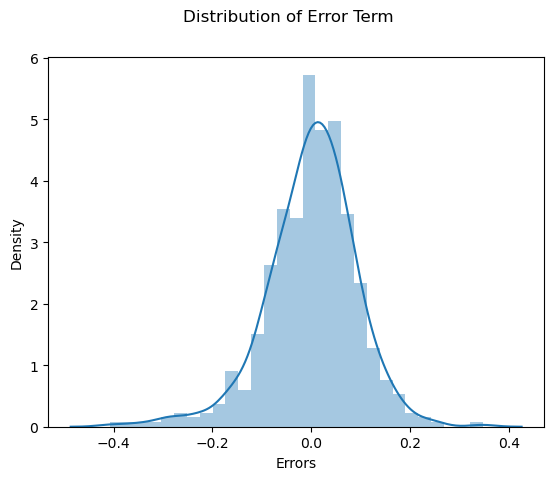

In [167]:
sns.distplot(residual)
plt.suptitle('Distribution of Error Term')
plt.xlabel('Errors')
plt.show()

### As we can see from above distribution plot that error term is normally distributed which shows that our model is build correctly and follows the assuption of linear regression model

# Making Predictions Using the Final Model

In [169]:
scale_features = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_test[scale_features] = scaler.transform(df_test[scale_features])

In [170]:
df_test.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,season_winter,yr_2019,mnth_february,mnth_march,mnth_april,mnth_may,mnth_june,mnth_july,mnth_august,mnth_september,mnth_october,mnth_november,mnth_december,weekday_monday,weekday_tuesday,weekday_wednesday,weekday_thursday,weekday_friday,weekday_saturday,weathersit_2,weathersit_3
184,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
535,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
299,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0
221,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
152,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [171]:
df_test[scale_features].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
temp,219.0,0.558941,0.233698,0.046591,0.354650,0.558691,0.759096,0.984424
atemp,219.0,0.532991,0.217888,0.025950,0.344751,0.549198,0.714132,0.980934
hum,219.0,0.638508,0.148974,0.261915,0.527265,0.627737,0.743928,1.002146
windspeed,219.0,0.313350,0.159947,-0.042808,0.198517,0.299459,0.403048,0.807474
cnt,219.0,0.520592,0.218435,0.048205,0.377531,0.524275,0.672745,0.963300


### Dividing test data into X_test and y_test set

In [172]:
y_test = df_test.pop('cnt')
X_test = df_test

In [173]:
X_test_new = X_test[X_train_new.columns]

X_test_new = sm.add_constant(X_test_new)


In [174]:
y_test_pred = model_06.predict(X_test_new)

In [175]:
from sklearn.metrics import r2_score

In [176]:
print('R-Squared of train data = ', round( r2_score(y_true = y_train, y_pred = y_train_pred ),2) )
print('R-Squared of test data = ', round( r2_score(y_true = y_test, y_pred = y_test_pred ),2) )

R-Squared of train data =  0.83
R-Squared of test data =  0.79


# Model Evaluation 

Text(0, 0.5, 'y_test_pred')

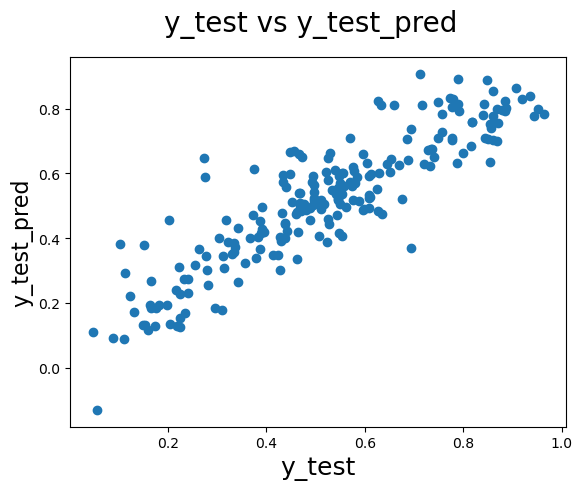

In [177]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_test_pred', fontsize = 16)     

### R squared on train data is 0.83 where as R squared on test data is 0.79 which is within acceptable range of 5% and also this shows that the model is doing good on new unseen data.

### Inferences :

1. The company should focus on temperature because it has a coefficient value of 0.5174, which means that increasing the temperature by one unit will increase the number of shared bikes by 0.5174.

2. Demand for shared bikes will be lower in adverse weather such as rain, snow, and thunderstorms, thus the company should consider this as well to design a strong business strategy.

3. The company should focus on the winter season, particularly the month of September, which has a high demand for shared bikes.

4. Year on year, demand for shared bikes will rise, and after normalcy, the corporation can evaluate the increase in demand.
5. Windspeed might have a negative impact on the demand for shared bikes because it has a negative coefficient of -0.1497. 

### Below variables are significant to predict the demand of shared bikes

1. holiday
2. temp
3. windspeed
4. season_summer
5. season_winter
6. yr_2019
7. mnth_august
8. weathersit_2
9. weathersit_3